# Cat butts

how and why they stink

Rather than reinventing the wheel with a large-scale effort to reconstruct 
the phylogeny of Carnivoria, we'll use one of the more recent published 
trees :

* Katrin Nyakatura and Olaf RP Bininda-Emonds, *Updating the evolutionary history of Carnivora (Mammalia): a new species-level supertree complete with divergence time estimates*, BMC Biology, 2012, [http://dx.doi.org/10.1186/1741-7007-10-12](http://dx.doi.org/10.1186/1741-7007-10-12)

Host trees are generated by pruning this tree to the relevant dataset.

In [53]:
import skbio

fecal_hosts = set()
for host in open('hosts/SpeciesListFecal.txt') :
    fecal_hosts.add(host.strip().replace('_',' '))

gland_hosts = set()
for host in open('hosts/SpeciesListAnalSac.txt') :
    gland_hosts.add(host.strip().replace('_',' '))    
    
tree = skbio.tree.TreeNode.read('hosts/carnivores.tree')

fecal_tree = tree.shear(fecal_hosts)
gland_tree = tree.shear(gland_hosts)

fecal_tree.write( 'hosts/carnivores_fecal.tree' )
gland_tree.write( 'hosts/carnivores_gland.tree' )

'hosts/carnivores_gland.tree'

In [125]:
from ete2 import Tree, TreeStyle, NodeStyle, TextFace
from numpy import linspace

ts = TreeStyle()
ts.mode = 'r'
#ts.mode = 'c'
ts.show_leaf_name = True
ts.branch_vertical_margin = 2
ts.scale = 1
ts.show_leaf_name = False
ts.show_scale = False

nstyle = NodeStyle()
nstyle['size'] = 0

### Host tree for available fecal samples

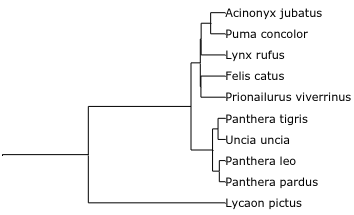

In [126]:
tree = Tree('hosts/carnivores_fecal.tree')

for node in tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ') )
        tf.fsize = 2.5
        tf.hz_align = 100
        node.add_face( tf, 0 )

tree.render("%%inline", w=100, units="mm", tree_style=ts)

### Host tree for available glad samples

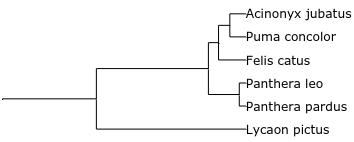

In [127]:
tree = Tree('hosts/carnivores_gland.tree')

for node in tree.traverse() :
    node.set_style(nstyle)
    if node.is_leaf :
        tf = TextFace( node.name.replace('_',' ') )
        tf.fsize = 2.5
        tf.hz_align = 100
        node.add_face( tf, 0 )
    
tree.render("%%inline", w=100, units="mm", tree_style=ts)

In [1]:
import pandas as pd

In [28]:
df = pd.DataFrame.from_csv( 'microbes/Metadata_Concatonated_Cats.txt', sep='\t' )
df.to_csv( 'microbes/mapping.tsv', sep='\t' )

In [29]:
fecal  = df[ df.SampleType=='Fecal'  ][ df.Phylogenetic_study==1 ]
rectal = df[ df.SampleType=='Rectal' ][ df.Phylogenetic_study==1 ]
anal   = df[ df.SampleType=='Anal'   ][ df.Phylogenetic_study==1 ]

useless_cols = [ 'OldMappingFile', 'Unnamed: 3', 'BarcodeSequence', 'LinkerPrimerSequence', 
                 'Phylogenetic_study', 'email', 'Kittybiome_participants', 
                 'Sample_storage_study', 'Treatment', 'Day', 'Description', 
                 'ng_ul', '4_ng_DNA', 'H2O_ul' ]

for study in [ fecal, rectal, anal ] :
    for col in useless_cols :
        del study[col]

In [36]:
print set(fecal['Species'])
print set(fecal['Species'].apply(lambda x : x.strip()))

set(['Cheetah ', 'Leopard', 'Domestic.cat', 'Snow leopard', 'Lion', 'Cheetah', 'Wild dog', 'Wild dog '])
set(['Leopard', 'Lion', 'Snow leopard', 'Domestic.cat', 'Cheetah', 'Wild dog'])
